In [1]:
#웹크롤링을 통한 리뷰 분석 시작

In [9]:
#main
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import requests
import re
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [5]:
#deriver option
option = Options()


In [325]:
#User_agent check
#driver.execute_script('return navigator.userAgent')

#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#path driver
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)

#url
url = 'https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43F8ROi2y0U2h8KlBwEuLVkCZMWDoxWDwgv4CeOBQhbvujsiqrsN_9qhoCRL0QAvD_BwE#/465083/'

#url 접속
response = requests.get(url)

driver.get(url)
driver.implicitly_wait(10)

search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
try:
    element.click()
except ValueError as m:
    print(m)
    time.sleep(1)
    driver.find_element_by_xpath(search_xpath).click()
    

#페이지 정보 업로드
html = driver.page_source
html_source = bs(html, 'html.parser')
soup = bs(html, 'html.parser')

#리뷰수 파악
num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
review_num=[]
for t in num:
    review_num.append(t.string)

<ipython-input-325-9099acfb8316>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)


In [118]:
#총리뷰수 구하기
total_review_num = int(review_num[1])

#xpath초기화
search_xpath=[]

#xpath 설정
if ((total_review_num//10) >0) :
    for i in range(total_review_num//10):
        tcp= '//*[@id="review"]/li['+str((i*10+2))+']'
        search_xpath.append(tcp)
    #xpath로 더보기
    for j in range(len(search_xpath)-1):
        try:
            element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
            element.click()
        except ValueError as m:
            print('error_ ',j)
            print(m)
            time.sleep(1)
            driver.find_element_by_xpath(search_xpath[j+1]).click()()
else:
    print('pass')
    pass

In [129]:
#저장
html = driver.page_source
html_source = bs(html, 'html.parser')
soup = bs(html, 'html.parser')

#review
restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
#review_award
restaurant_star = html_source.find_all("span", attrs = {"class":'total'})

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=97.0.4692.71)
Stacktrace:
0   chromedriver                        0x00000001013bd408 __gxx_personality_v0 + 543364
1   chromedriver                        0x0000000101353138 __gxx_personality_v0 + 108468
2   chromedriver                        0x0000000100f527d8 chromedriver + 157656
3   chromedriver                        0x0000000100f43b00 chromedriver + 97024
4   chromedriver                        0x0000000100f3e4d0 chromedriver + 74960
5   chromedriver                        0x0000000100faafd8 chromedriver + 520152
6   chromedriver                        0x0000000100f77238 chromedriver + 307768
7   chromedriver                        0x0000000101380c7c __gxx_personality_v0 + 295672
8   chromedriver                        0x0000000101394bd8 __gxx_personality_v0 + 377428
9   chromedriver                        0x00000001013992b0 __gxx_personality_v0 + 395564
10  chromedriver                        0x00000001013959f8 __gxx_personality_v0 + 381044
11  chromedriver                        0x0000000101376754 __gxx_personality_v0 + 253392
12  chromedriver                        0x00000001013aea38 __gxx_personality_v0 + 483508
13  chromedriver                        0x00000001013aebac __gxx_personality_v0 + 483880
14  chromedriver                        0x00000001013c3fec __gxx_personality_v0 + 570984
15  libsystem_pthread.dylib             0x00000001942dd240 _pthread_start + 148
16  libsystem_pthread.dylib             0x00000001942d8024 thread_start + 8


In [127]:
#리뷰만

review_list = []
result_list = []
#데이터 배열
for i in restaurant_re:
    tmp=re.sub(r'[\n\r]+', '',i.string)
    tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
    review_list.append(tmp)
   

In [133]:
#별점
star_tmp=[]
for q in restaurant_star:
        g=(str(str(q)).count('full ng-scope'))
        star_tmp.append(g)

In [136]:
#데이터 프레임 형태로 만들기
COLUM = 2
ROW = len(star_tmp)
total = [[0 for i in range(COLUM)] for j in range(ROW)] 
for i in range(len(review_list)):
    total[i][0]=review_list[i]
for i in range(len(star_tmp)):
    total[i][1]=(star_tmp[i])

In [186]:
#함수
def yogiyo(url):
    response = requests.get(url)

    driver.get(url)
    driver.implicitly_wait(10)

    search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
    try:
        element.click()
    except ValueError as m:
        print(m)
        time.sleep(1)
        driver.find_element_by_xpath(search_xpath).click()


    #페이지 정보 업로드
    html = driver.page_source
    html_source = bs(html, 'html.parser')
    soup = bs(html, 'html.parser')

    #리뷰수 파악
    num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
    review_num=[]
    for t in num:
        review_num.append(t.string)
    #총리뷰수 구하기
    total_review_num = int(review_num[1])

    #xpath초기화
    search_xpath=[]

    #xpath 설정
    if ((total_review_num//10) >0) :
        for i in range(total_review_num//10):
            tcp= '//*[@id="review"]/li['+str((i*10+2))+']'
            search_xpath.append(tcp)
        #xpath로 더보기
        for j in range(len(search_xpath)-1):
            try:
                element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
                element.click()
            except ValueError as m:
                print('error_ ',j)
                print(m)
                time.sleep(1)
                driver.find_element_by_xpath(search_xpath[j+1]).click()()
    else:
        print('pass')
        pass
    #저장
    html = driver.page_source
    html_source = bs(html, 'html.parser')
    soup = bs(html, 'html.parser')

    #review
    restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
    #review_award
    restaurant_star = html_source.find_all("span", attrs = {"class":'total'})
    #리뷰만

    review_list = []
    result_list = []
    #데이터 배열
    for i in restaurant_re:
        tmp=re.sub(r'[\n\r]+', '',i.string)
        tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
        review_list.append(tmp)
    #별점
    star_tmp=[]
    for q in restaurant_star:
            g=(str(str(q)).count('full ng-scope'))
            star_tmp.append(g)
    #데이터 프레임 형태로 만들기
    COLUM = 2
    ROW = len(star_tmp)
    total = [[0 for i in range(COLUM)] for j in range(ROW)] 
    for i in range(len(review_list)):
        total[i][0]=review_list[i]
    for i in range(len(star_tmp)):
        total[i][1]=(star_tmp[i])
    

In [187]:
#url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43Fydq6Co8zJWDqTsovrBkrN3mMNxafoJ1ZjbVXWA1Ad0o_9c6Q-qV4xoCQRUQAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
#User_agent check
#driver.execute_script('return navigator.userAgent')

#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#path driver
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)

#url
url = 'https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43Fydq6Co8zJWDqTsovrBkrN3mMNxafoJ1ZjbVXWA1Ad0o_9c6Q-qV4xoCQRUQAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'

#url 접속
response = requests.get(url)

driver.get(url)
driver.implicitly_wait(10)

#페이지 정보 업로드
html = driver.page_source
html_source = bs(html, 'html.parser')
soup = bs(html, 'html.parser')

html_source.find_all("div", attrs = {"class":"review_num ng-binding",'ng-show':"restaurant.review_count > 0"})



<ipython-input-187-f4801d62487b>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)


[]

In [178]:
res_num=[]
a=html_source.find_all("span", attrs = {"class":"review_num ng-binding",'ng-show':"restaurant.review_count > 0"})
for i in a :
    tmp=re.sub(r'[\n\r]+', '',i.get_text())
    tmp=" ".join(re.compile(r'[0-9]+').findall(tmp))
    res_num.append(tmp)

In [179]:
res_name=[]
a=html_source.find_all("div", attrs = {"class":"restaurant-name ng-binding",'ng-bind':"restaurant.name"})
for i in a :
    tmp=re.sub(r'[\n\r]+', '',i.get_text())
    res_name.append(tmp)

<ipython-input-403-60bf052aa136>:3: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:


In [ ]:
#selector로 클릭하기.

상단의 yogiyo함수는 url로 직접 가맹점에 접속해서 크롤링 하는 방법이였다.
하지만 내가 필요한건 자동으로 여러개의 가맹점을 크롤링을 해야하기 떄문에 하기처럼 변경을 하였다.

In [609]:
#이것만 된다면
COLUM = 2
ROW = 1
total = [[0 for r in range(COLUM)] for j in range(ROW)] 
        
#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#driver path 
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)

#url 접속
url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43F8ROi2y0U2h8KlBwEuLVkCZMWDoxWDwgv4CeOBQhbvujsiqrsN_9qhoCRL0QAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
#yogiyo_selector(url)
response = requests.get(url)

driver.get(url)
driver.implicitly_wait(10)
time.sleep(2)
driver.execute_script("location.reload()")
time.sleep(2)    
selector_tmp = []

tmp1='document.querySelector('
tmp2="'#content > div > div:nth-child(4) > div > div.restaurant-list > div:nth-child("
tmp3=tmp1+tmp2
tmp4=") > div')"
tmp5=".click()"

for i in range(10000):
    tmp6=str(i+1)
    tmp=tmp3+tmp6+tmp4+tmp5
    selector_tmp.append(tmp)

selector_find=[]
for i in range(10000):
    selector_find.append("#content > div > div:nth-child(4 > div > div.restaurant-list > div:nth-child("+str(i+1)+") > div")

for i in range(10000):
    try:
        driver.execute_script(selector_tmp[i])

        search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
#        while len(driver.find_elements_by_xpath(search_xpath))<0:
#            time.sleep(1)
#        element.click()
        try:
            element.click()
        except:
            while len(driver.find_elements_by_xpath(search_xpath))<0: 
                time.sleep(1.001)
            driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
            time.sleep(2)
            element.click()
        '''
        except ValueError as m:
            time.sleep(1)
            driver.find_element_by_xpath(search_xpath).click()
            '''

        #페이지 정보 업로드
        html = driver.page_source
        html_source = bs(html, 'html.parser')
        soup = bs(html, 'html.parser')

        #리뷰수 파악
        num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
        review_num=[]
        for t in num:
            review_num.append(t.string)
        #총리뷰수 구하기
        total_review_num = int(review_num[1])

        #xpath초기화
        search_xpath=[]

        #xpath 설정
        if ((total_review_num//10) >0) :
            for k in range(total_review_num//10):
                xpath_tmp= '//*[@id="review"]/li['+str((k*10+2))+']'
                search_xpath.append(xpath_tmp)
            #xpath로 더보기
            print('더보기시작')
            for j in range(len(search_xpath)-1):
                try:

                    element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
                    while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
                        time.sleep(0.001)
                    element.click()
                except:
                    while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
                        time.sleep(0.001)
                    element.click()
              

        #저장
        html = driver.page_source
        html_source = bs(html, 'html.parser')
        soup = bs(html, 'html.parser')

        #review
        restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
        #review_award
        restaurant_star = html_source.find_all("span", attrs = {"class":'total'})
        #리뷰만

        review_list = []
        result_list = []
        #데이터 배열
        for r in restaurant_re:
            tmp=re.sub(r'[\n\r]+', '',r.string)
            tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
            review_list.append(tmp)
        #별점
        star_tmp=[]
        for q in restaurant_star:
                g=(str(str(q)).count('full ng-scope'))
                star_tmp.append(g)
        #데이터 프레임 형태로 만들기
        COLUM = 2
        ROW = len(star_tmp)
        total_tmp = [[0 for r in range(COLUM)] for j in range(ROW)] 
        for r in range(len(review_list)):
            total_tmp[r][0]=review_list[r]
        for r in range(len(star_tmp)):
            total_tmp[r][1]=(star_tmp[r])
        total.append(total_tmp)  
        driver.get(url)
        time.sleep(3)
    except ValueError as m:
        print(m)
        break


<ipython-input-609-f0fe05cda45b>:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver',options=option)


더보기시작


<ipython-input-609-f0fe05cda45b>:87: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
<ipython-input-609-f0fe05cda45b>:91: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath[j+1]))<0:
<ipython-input-609-f0fe05cda45b>:51: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  while len(driver.find_elements_by_xpath(search_xpath))<0:


더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작
더보기시작


JavascriptException: Message: javascript error: Cannot read properties of null (reading 'click')
  (Session info: chrome=97.0.4692.71)
Stacktrace:
0   chromedriver                        0x00000001048e5408 __gxx_personality_v0 + 543364
1   chromedriver                        0x000000010487b138 __gxx_personality_v0 + 108468
2   chromedriver                        0x000000010447a7d8 chromedriver + 157656
3   chromedriver                        0x000000010447d258 chromedriver + 168536
4   chromedriver                        0x000000010447d0c4 chromedriver + 168132
5   chromedriver                        0x000000010447da4c chromedriver + 170572
6   chromedriver                        0x00000001044d4270 chromedriver + 524912
7   chromedriver                        0x00000001044d37d4 chromedriver + 522196
8   chromedriver                        0x000000010449f238 chromedriver + 307768
9   chromedriver                        0x00000001048a8c7c __gxx_personality_v0 + 295672
10  chromedriver                        0x00000001048bcbd8 __gxx_personality_v0 + 377428
11  chromedriver                        0x00000001048c12b0 __gxx_personality_v0 + 395564
12  chromedriver                        0x00000001048bd9f8 __gxx_personality_v0 + 381044
13  chromedriver                        0x000000010489e754 __gxx_personality_v0 + 253392
14  chromedriver                        0x00000001048d6a38 __gxx_personality_v0 + 483508
15  chromedriver                        0x00000001048d6bac __gxx_personality_v0 + 483880
16  chromedriver                        0x00000001048ebfec __gxx_personality_v0 + 570984
17  libsystem_pthread.dylib             0x00000001942dd240 _pthread_start + 148
18  libsystem_pthread.dylib             0x00000001942d8024 thread_start + 8


In [614]:
len(total[:])

61

In [616]:
#del total[0]
df=pd.DataFrame()
for i in range(len(total[:])):
    df_tmp=pd.DataFrame(data=total[i][:][:],columns=['리뷰','별점'])
    df=pd.concat([df,df_tmp])


In [619]:
df_tmp1=pd.concat([df,df,df])

In [626]:
#전체 데이터와 결측치 확인
print(df.shape)
df.info()

(46327, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46327 entries, 0 to 1059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      46327 non-null  object
 1   별점      46327 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


5    38203
4     5146
3     1639
1      851
2      488
Name: 별점, dtype: int64


<AxesSubplot:>

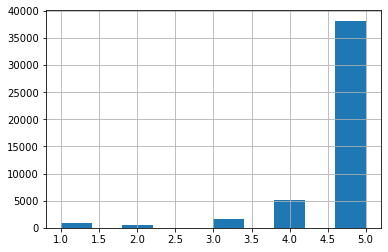

In [625]:
print(df['별점'].value_counts())
df['별점'].hist()

In [733]:
df_tmp=df
index_no=df_tmp[df_tmp['리뷰']==''].index
df_tmp.drop(index_no)

,리뷰,별점
0,저번에 리뷰이벤트참여 안적어서 못먹었던 떡볶이 오늘 맛나게 먹었어용 치킨도 물론 맛...,5
1,첨 시켜먹어보는대 너무 맛있게 잘 먹었습니다,5
2,후라이드는 역시 치킨플러스지요 기본 염지가 잘된 진짜 후라이드맛집 서비스로 치즈스틱...,5
3,배달이 약간 오래 걸리긴 했지만치킨 떡볶이 둘다 맛있어서 좋았네요,5
4,너무 맛있어요 떡볶이도 맛있고 날씨도 추운데 따뜻하고 빠르게 배달 왔어요,5
...,...,...
46322,배달도 빠르고 맛있어요,5
46323,잘먹었습니다 달력도 감사합니다 항상 5 동점만 먹어서 다른곳보다 양도 많은거 같아요,5
46324,리뷰쓰려는데 왜자꾸 리뷰내용에 개인정보쓰면 안된다고 하는거죠 게속 재시도 해봣는데도...,5
46325,치킨 맛있는건 정말 보증 하는데요 오늘 배달이 조금 아쉬워요 치킨 소스가 다 넘쳐서...,5


In [630]:
#혹시몰라 저장
df.to_csv('./df.csv',index=False)

In [725]:
df= pd.read_csv('./df_tmp.csv')

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      45964 non-null  object
 1   별점      46327 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 724.0+ KB


In [705]:
# 점수를 기준으로 긍정(4,5)과 부정(1-3)으로 변환
def rating_to_label(rating):
    if rating > 2:
        return 1
    else:
        return 0
    
df['y'] = df['별점'].apply(lambda x: rating_to_label(x))

In [723]:
df

,리뷰,별점
0,저번에 리뷰이벤트참여 안적어서 못먹었던 떡볶이 오늘 맛나게 먹었어용 치킨도 물론 맛...,5
1,첨 시켜먹어보는대 너무 맛있게 잘 먹었습니다,5
2,후라이드는 역시 치킨플러스지요 기본 염지가 잘된 진짜 후라이드맛집 서비스로 치즈스틱...,5
3,배달이 약간 오래 걸리긴 했지만치킨 떡볶이 둘다 맛있어서 좋았네요,5
4,너무 맛있어요 떡볶이도 맛있고 날씨도 추운데 따뜻하고 빠르게 배달 왔어요,5
...,...,...
46322,배달도 빠르고 맛있어요,5
46323,잘먹었습니다 달력도 감사합니다 항상 5 동점만 먹어서 다른곳보다 양도 많은거 같아요,5
46324,리뷰쓰려는데 왜자꾸 리뷰내용에 개인정보쓰면 안된다고 하는거죠 게속 재시도 해봣는데도...,5
46325,치킨 맛있는건 정말 보증 하는데요 오늘 배달이 조금 아쉬워요 치킨 소스가 다 넘쳐서...,5


In [721]:
df

,리뷰,별점,y,a,f,t
0,저번에 리뷰이벤트참여 안적어서 못먹었던 떡볶이 오늘 맛나게 먹었어용 치킨도 물론 맛...,5,1,1,1,1
1,첨 시켜먹어보는대 너무 맛있게 잘 먹었습니다,5,1,1,1,1
2,후라이드는 역시 치킨플러스지요 기본 염지가 잘된 진짜 후라이드맛집 서비스로 치즈스틱...,5,1,1,1,1
3,배달이 약간 오래 걸리긴 했지만치킨 떡볶이 둘다 맛있어서 좋았네요,5,1,1,1,1
4,너무 맛있어요 떡볶이도 맛있고 날씨도 추운데 따뜻하고 빠르게 배달 왔어요,5,1,1,1,1
...,...,...,...,...,...,...
1055,배달도 빠르고 맛있어요,5,1,1,1,1
1056,잘먹었습니다 달력도 감사합니다 항상 5 동점만 먹어서 다른곳보다 양도 많은거 같아요,5,1,1,1,1
1057,리뷰쓰려는데 왜자꾸 리뷰내용에 개인정보쓰면 안된다고 하는거죠 게속 재시도 해봣는데도...,5,1,1,1,1
1058,치킨 맛있는건 정말 보증 하는데요 오늘 배달이 조금 아쉬워요 치킨 소스가 다 넘쳐서...,5,1,1,1,1


In [668]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

1    38203
0     8124
Name: y, dtype: int64

In [681]:
#크론바흐 알파 신뢰도 검증
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from factor_analyzer import FactorAnalyzer

In [711]:
df['t'] = df['별점'].apply(lambda x: rating_to_label(x))

In [713]:
items = df.columns.tolist()[1:]

In [701]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [714]:
items

['별점', 'y', 'a', 'f', 't']

In [715]:
fa = FactorAnalyzer(n_factors=3, method="ml", rotation="promax")
fa.fit(df[items])

LinAlgError: Singular matrix

In [348]:
#url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43Fydq6Co8zJWDqTsovrBkrN3mMNxafoJ1ZjbVXWA1Ad0o_9c6Q-qV4xoCQRUQAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
#User_agent check
#driver.execute_script('return navigator.userAgent')

#do not use images
option.add_argument('--blink-settings=imagesEnabled=false')

#driver path 
driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver')

#url 접속

url='https://www.yogiyo.co.kr/mobile/?gclid=CjwKCAiAlfqOBhAeEiwAYi43F8ROi2y0U2h8KlBwEuLVkCZMWDoxWDwgv4CeOBQhbvujsiqrsN_9qhoCRL0QAvD_BwE#/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/152091/%EC%B9%98%ED%82%A8/'
yogiyo_selector(url)

<ipython-input-348-bd126e97c34f>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/heetae/Desktop/chromedriver')
<ipython-input-347-3816bae0dde9>:108: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)


In [347]:
#함수
def yogiyo_selector(url):
    response = requests.get(url)
    
    driver.get(url)
    driver.implicitly_wait(10)
    time.sleep(2)
    driver.execute_script("location.reload()")
    time.sleep(2)    
    selector_tmp = []
    
    tmp1='document.querySelector('
    tmp2="'#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("
    tmp3=tmp1+tmp2
    tmp4=") > div')"
    tmp5=".click()"

    for i in range(10000):
        tmp6=str(i+1)
        tmp=tmp3+tmp6+tmp4+tmp5
        selector_tmp.append(tmp)

    selector_find=[]
    for i in range(10000):
        selector_find.append("#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("+str(i+1)+") > div")

    for i in range(10000):
        try:
            driver.execute_script(selector_tmp[i])

            search_xpath = '//*[@id="content"]/div[2]/div[1]/ul/li[2]/a'
            element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,search_xpath)))
            try:
                element.click()
            except ValueError as m:
                print(m)
                time.sleep(1)
                driver.find_element_by_xpath(search_xpath).click()


            #페이지 정보 업로드
            html = driver.page_source
            html_source = bs(html, 'html.parser')
            soup = bs(html, 'html.parser')

            #리뷰수 파악
            num = html_source.find_all("strong", attrs = {"class":'ng-binding'})
            review_num=[]
            for t in num:
                review_num.append(t.string)
            #총리뷰수 구하기
            total_review_num = int(review_num[1])

            #xpath초기화
            search_xpath=[]

            #xpath 설정
            if ((total_review_num//10) >0) :
                for i in range(total_review_num//10):
                    tcp= '//*[@id="review"]/li['+str((i*10+2))+']'
                    search_xpath.append(tcp)
                #xpath로 더보기
                for j in range(len(search_xpath)-1):
                    try:
                        element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH,search_xpath[j+1])))
                        element.click()
                    except ValueError as m:
                        print('error_ ',j)
                        print(m)
                        time.sleep(1)
                        driver.find_element_by_xpath(search_xpath[j+1]).click()()
            else:
                print('pass')
                pass
            #저장
            html = driver.page_source
            html_source = bs(html, 'html.parser')
            soup = bs(html, 'html.parser')

            #review
            restaurant_re = html_source.find_all("p", attrs = {"class":"ng-binding",'ng-bind-html':"review.comment|strip_html"})
            #review_award
            restaurant_star = html_source.find_all("span", attrs = {"class":'total'})
            #리뷰만

            review_list = []
            result_list = []
            #데이터 배열
            for i in restaurant_re:
                tmp=re.sub(r'[\n\r]+', '',i.string)
                tmp=" ".join(re.compile(r'[가-힣]+|[0-9]+').findall(tmp))
                review_list.append(tmp)
            #별점
            star_tmp=[]
            for q in restaurant_star:
                    g=(str(str(q)).count('full ng-scope'))
                    star_tmp.append(g)
            #데이터 프레임 형태로 만들기
            COLUM = 2
            ROW = len(star_tmp)
            total = [[0 for i in range(COLUM)] for j in range(ROW)] 
            for i in range(len(review_list)):
                total[i][0]=review_list[i]
            for i in range(len(star_tmp)):
                total[i][1]=(star_tmp[i])
        except:
            try:
                driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
            except:
                break
            break
            

selector를 사용하여야 한다.

#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child(1) > div
이게 요기요 가맹점에 들어가는 selector다. 

요기요의 경우 광고로 인한 노출이 두가지가 있다. 하지만 내가 필요한 정보와 중첩이 되기 떄문에 요기요에 등록된 것만 필요하다.
중간의 div:nth-child(숫자)에서 숫자가 1이면 최상단에 광고노출박스, 2면 슈퍼레드위크 추천, 3이면 일반이다.

뒤 div:nth-child(1)가 핵심이다.
1~n으로 늘어난다. 따라서 이부분은 추출을 할 수 없어서 강제로 for문으로 만들어 주었다.
하지만 \가 출력되는 에러가 있어서 복잡하지만 하기의 방법처럼 추가를 해주어야 한다.

In [327]:

selector_tmp = []

tmp1='document.querySelector('
tmp2="'#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("
tmp3=tmp1+tmp2
tmp4=") > div')"
tmp5=".click()"

for i in range(10000):
    tmp6=str(i+1)
    tmp=tmp3+tmp6+tmp4+tmp5
    selector_tmp.append(tmp)
    
selector_find=[]
for i in range(10000):
    selector_find.append("#content > div > div:nth-child(3) > div > div.restaurant-list > div:nth-child("+str(i+1)+") > div")